### Performing the same Data preprocessing for the random forest model as well

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading the dataset with correct divider

In [2]:
df = pd.read_csv('./Dataset/bank-full.csv', delimiter=';')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### Checking for missing values

In [3]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


#### Checking for duplicate values

In [4]:
print(df.duplicated().sum())  # Count the number of duplicate rows

0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Getting the numerical values

In [7]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric Columns:", numeric_columns)

Numeric Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


#### Getting the Categorical values

In [8]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


#### Checking for the Boolean values

In [9]:
boolean_columns = df.select_dtypes(include=['bool']).columns
print("Boolean Columns:", boolean_columns)

Boolean Columns: Index([], dtype='object')


#### Indentifying the unique values for each columns one by one

In [10]:
df['job'].unique()
df['marital'].unique()
df['education'].unique()
df['default'].unique()
df['housing'].unique()
df['contact'].unique()
df['month'].unique()
df['poutcome'].unique()
df['y'].unique()
df['campaign'].unique()


array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

#### Checking whether y depends on contact feature

In [11]:
pd.crosstab(df['contact'], df['y'], normalize='index')

y,no,yes
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


##### To determine if the feature is important, chi2_contingency test is used to evaluate independence of the two categorical variables.

In [12]:
from scipy.stats import chi2_contingency

# If p value is < 0.05, the feature is influencing the targeted variable

crosstab = pd.crosstab(df['contact'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 1035.714225356292
p-value: 1.251738325340638e-225


#### According to the result, removing the contact feature is a better option

In [13]:
df = df.drop(columns=['contact'])

#### Check for poutcome feature

In [14]:
crosstab = pd.crosstab(df['poutcome'], df['y'])
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 4391.5065887686615
p-value: 0.0


<Axes: xlabel='y', ylabel='pdays'>

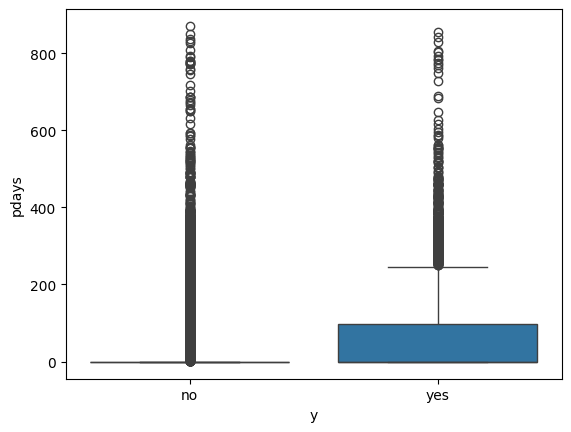

In [15]:
sns.boxplot(x='y', y='pdays', data=df)

#### Encoding the Y variable and Checking the correlation between the numerical features

In [16]:
from scipy.stats import pointbiserialr

# Step 1: Convert 'y' to numeric (binary)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Step 2: Define numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Step 3: Calculate Point-Biserial Correlation for each feature
correlation_results = []
for col in numerical_features:
    corr, p_value = pointbiserialr(df[col], df['y'])
    correlation_results.append((col, corr, p_value))

# Step 4: Print results
print("Feature-wise Point-Biserial Correlation and p-values:")
for feature, corr, p_value in correlation_results:
    print(f"Feature: {feature}, Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Feature-wise Point-Biserial Correlation and p-values:
Feature: age, Correlation: 0.025, p-value: 0.000
Feature: balance, Correlation: 0.053, p-value: 0.000
Feature: day, Correlation: -0.028, p-value: 0.000
Feature: duration, Correlation: 0.395, p-value: 0.000
Feature: campaign, Correlation: -0.073, p-value: 0.000
Feature: pdays, Correlation: 0.104, p-value: 0.000
Feature: previous, Correlation: 0.093, p-value: 0.000


##### By analysing the correlation, we can see that day feature does a very less impact in the prediction. So removing it will be a better option. Same as that the month column has similar characteristic. considering that it can be removed

In [17]:
df = df.drop(columns=['day', 'month'])

#### Check for outliers using box plot for numerical  values


<Axes: xlabel='y', ylabel='campaign'>

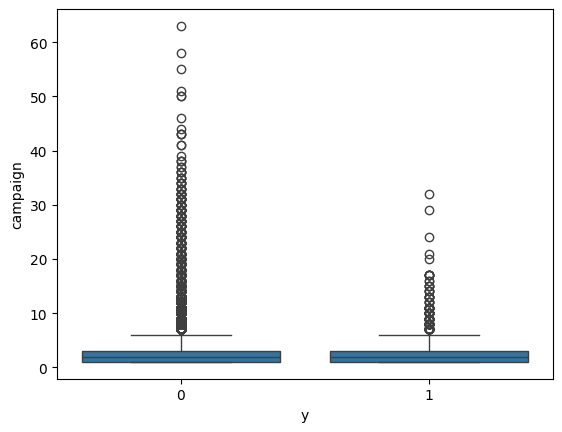

In [18]:
sns.boxplot(x='y', y='campaign', data=df)

##### there's no negative values here. so we can use as it is.

<Axes: xlabel='y', ylabel='duration'>

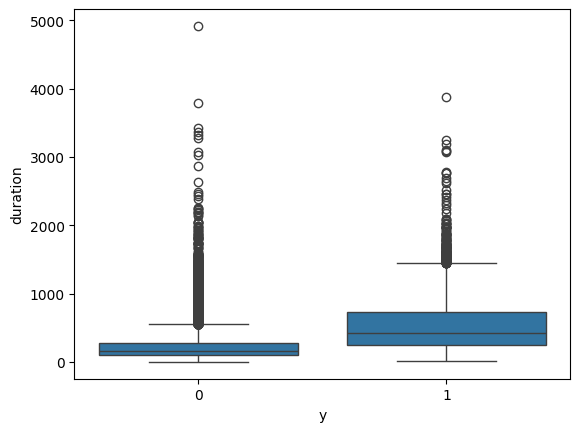

In [19]:
sns.boxplot(x='y', y='duration', data=df)

##### As we can see there's no negative values here. so we can use it as it is.

<Axes: xlabel='y', ylabel='age'>

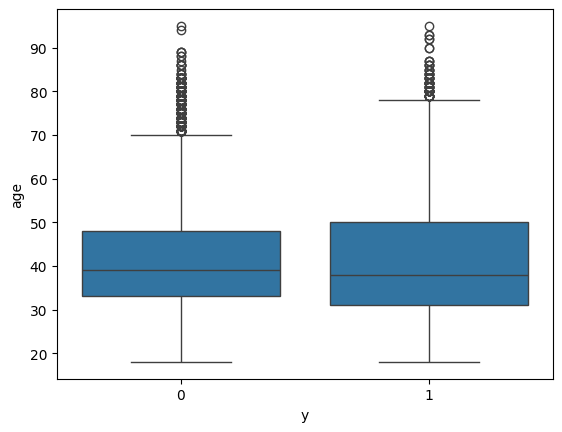

In [20]:
sns.boxplot(x='y', y='age', data=df)

##### There are some extreme values. though those are accpetable. so it can be used directly

<Axes: xlabel='y', ylabel='balance'>

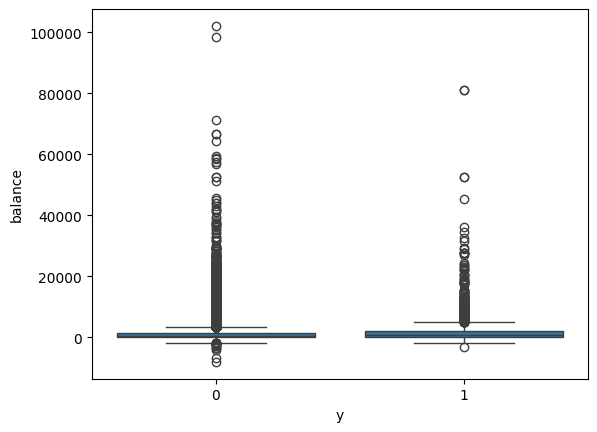

In [21]:
sns.boxplot(x='y', y='balance', data=df)

##### there are negative values as well as extreme values. in this case both can  be accepted. extreme values can be there on some circumstances. for negative values, it can be considered as credits. so can be applied directly

In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,0


##### #Label endcoding is used for the categorical features below. these features are important and also it has only two values. to reduce dimension label encoding is used here

In [23]:
# List of columns to apply Label Encoding to (yes/no columns)
yes_no_columns = ['default', 'housing', 'loan']

# Apply Label Encoding to each of the columns in the list
df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})

df.head()

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_15260\3595634537.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'yes': 1, 'no': 0})


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,198,1,-1,0,unknown,0


##### Doing Label encoding for education. it has a perfect relationship between each unique values. Also it will reduce the dimensionality of the dataset

In [24]:
# Label Encoding
education_mapping = {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

df['education_encoded'] = df['education'].map(education_mapping)
df = df.drop(columns=['education'])
df.head()

,age,job,marital,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y,education_encoded
0,58,management,married,0,2143,1,0,261,1,-1,0,unknown,0,2
1,44,technician,single,0,29,1,0,151,1,-1,0,unknown,0,1
2,33,entrepreneur,married,0,2,1,1,76,1,-1,0,unknown,0,1
3,47,blue-collar,married,0,1506,1,0,92,1,-1,0,unknown,0,3
4,33,unknown,single,0,1,0,0,198,1,-1,0,unknown,0,3


#### Encodinf for job feature

In [25]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

##### This feature plays a crucial role on the trget variable. the perfect approach to this feature is one hot encoding which will treat each category independently

In [26]:
# Apply One-Hot Encoding to the 'job' column
df_encoded = pd.get_dummies(df['job'], prefix='job')

# Convert True/False to 1/0
df_encoded = df_encoded.astype(int)

# Optionally, concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'job' column (optional)
df.drop('job', axis=1, inplace=True)

df.head()

,age,marital,default,balance,housing,loan,duration,campaign,pdays,previous,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,0,2143,1,0,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,single,0,29,1,0,151,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,married,0,2,1,1,76,1,-1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,married,0,1506,1,0,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,single,0,1,0,0,198,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
print(df)

       age   marital  default  balance  housing  loan  duration  campaign  \
0       58   married        0     2143        1     0       261         1   
1       44    single        0       29        1     0       151         1   
2       33   married        0        2        1     1        76         1   
3       47   married        0     1506        1     0        92         1   
4       33    single        0        1        0     0       198         1   
...    ...       ...      ...      ...      ...   ...       ...       ...   
45206   51   married        0      825        0     0       977         3   
45207   71  divorced        0     1729        0     0       456         2   
45208   72   married        0     5715        0     0      1127         5   
45209   57   married        0      668        0     0       508         4   
45210   37   married        0     2971        0     0       361         2   

       pdays  previous  ... job_entrepreneur  job_housemaid  job_management

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'poutcome' column
df['poutcome_encoded'] = label_encoder.fit_transform(df['poutcome'])

df.drop('poutcome', axis=1, inplace=True)


# Display the resulting DataFrame
print(df)

       age   marital  default  balance  housing  loan  duration  campaign  \
0       58   married        0     2143        1     0       261         1   
1       44    single        0       29        1     0       151         1   
2       33   married        0        2        1     1        76         1   
3       47   married        0     1506        1     0        92         1   
4       33    single        0        1        0     0       198         1   
...    ...       ...      ...      ...      ...   ...       ...       ...   
45206   51   married        0      825        0     0       977         3   
45207   71  divorced        0     1729        0     0       456         2   
45208   72   married        0     5715        0     0      1127         5   
45209   57   married        0      668        0     0       508         4   
45210   37   married        0     2971        0     0       361         2   

       pdays  previous  ...  job_housemaid  job_management  job_retired  \


#### marital will also play a huge role on prediction. so treating them indpendently will be a boost in the model. so one hot encoding is more suitable here

In [29]:
# Apply One-Hot Encoding to the 'marital' column
df_encoded = pd.get_dummies(df['marital'], prefix='marital')

# Convert boolean columns to integers (1 for True, 0 for False)
df_encoded = df_encoded.astype(int)

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'marital' column
df.drop('marital', axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

       age  default  balance  housing  loan  duration  campaign  pdays  \
0       58        0     2143        1     0       261         1     -1   
1       44        0       29        1     0       151         1     -1   
2       33        0        2        1     1        76         1     -1   
3       47        0     1506        1     0        92         1     -1   
4       33        0        1        0     0       198         1     -1   
...    ...      ...      ...      ...   ...       ...       ...    ...   
45206   51        0      825        0     0       977         3     -1   
45207   71        0     1729        0     0       456         2     -1   
45208   72        0     5715        0     0      1127         5    184   
45209   57        0      668        0     0       508         4     -1   
45210   37        0     2971        0     0       361         2    188   

       previous  y  ...  job_self-employed  job_services  job_student  \
0             0  0  ...               

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   default            45211 non-null  int64
 2   balance            45211 non-null  int64
 3   housing            45211 non-null  int64
 4   loan               45211 non-null  int64
 5   duration           45211 non-null  int64
 6   campaign           45211 non-null  int64
 7   pdays              45211 non-null  int64
 8   previous           45211 non-null  int64
 9   y                  45211 non-null  int64
 10  education_encoded  45211 non-null  int64
 11  job_admin.         45211 non-null  int32
 12  job_blue-collar    45211 non-null  int32
 13  job_entrepreneur   45211 non-null  int32
 14  job_housemaid      45211 non-null  int32
 15  job_management     45211 non-null  int32
 16  job_retired        45211 non-null  int32
 17  job_self-emp

#### Finally we train the random forest model with our preprocessed data

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features (all columns except 'y')
X = df.drop('y', axis=1)

# Target variable
y = df['y']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#### Model evaluation

In [35]:

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Scores: {cv_scores}")

print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

Random Forest Model Accuracy: 89.66%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.62      0.37      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043


Confusion Matrix:
[[7709  243]
 [ 692  399]]

Cross-Validation Scores: [0.89019131 0.88520239 0.88188454 0.87624419 0.75016589]
Mean Cross-Validation Accuracy: 85.67%


#### Hyper parameter tuning

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter distribution for random sampling
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=30,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',  # Scoring metric
    random_state=42,
    n_jobs=-1    # Use all available CPU cores
)

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20}
Model Accuracy: 89.59%

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.63      0.33      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043


Confusion Matrix:
[[7744  208]
 [ 733  358]]


#### Handling class imbalance

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#### Performing cross validation

In [41]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation on the training set
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores for Each Fold: ", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation of CV Scores: {cv_scores.std() * 100:.2f}%")


Cross-Validation Scores for Each Fold:  [0.89908764 0.89950235 0.90143766 0.90087101 0.89672335]
Mean Cross-Validation Accuracy: 89.95%
Standard Deviation of CV Scores: 0.16%
